# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd

## Regression Model Evaluation

In [2]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [5]:
from sklearn.metrics import r2_score

print(f'train error: {r2_score(y_train, predictions_train)}')
print(f'test error: {r2_score(y_test, predictions_test)}')

train error: 0.7359832922784879
test error: 0.7345367250237123


Pay attention to the fact that changing the ground truth and predictions position also changes the result (the denominator is computed as a function of the ground truth mean)

## 4. Calculate and print mean squared error for both the training and the testing set.

In [6]:
from sklearn.metrics import mean_squared_error

print(f'train error: {mean_squared_error(y_train, predictions_train)}')
print(f'test error: {mean_squared_error(y_test, predictions_test)}')

train error: 24.212339512128164
test error: 14.655356057073258


Differently from the previous case, changing the positions does not affect since the MSE only measures distances between points

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [7]:
from sklearn.metrics import mean_absolute_error

print(f'train error: {mean_absolute_error(y_train, predictions_train)}')
print(f'test error: {mean_absolute_error(y_test, predictions_test)}')

train error: 3.480872081878651
test error: 2.930496051732593


## Classification Model Evaluation

In [8]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', multi_class='auto')
model.fit(X_train, y_train.values.ravel())

predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

/home/ubuntu/.venvs/ironhack_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [11]:
from sklearn.metrics import accuracy_score

print(f'train error: {accuracy_score(y_train, predictions_train)}')
print(f'test error: {accuracy_score(y_test, predictions_test)}')

train error: 0.975
test error: 0.9666666666666667


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [12]:
from sklearn.metrics import balanced_accuracy_score

print(f'train error: {balanced_accuracy_score(y_train, predictions_train)}')
print(f'test error: {balanced_accuracy_score(y_test, predictions_test)}')

train error: 0.9743589743589743
test error: 0.9696969696969697


## 10. Calculate and print the precision score for both the training and the testing set.

In [13]:
from sklearn.metrics import precision_score

print(f'train error: {precision_score(y_train, predictions_train, average=None)}')
print(f'test error: {precision_score(y_test, predictions_test, average=None)}')

train error: [1.         0.97368421 0.95      ]
test error: [1.         0.91666667 1.        ]


Explanation of different means:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

In [14]:
y_true = [0, 0, 0, 0, 1, 2]
y_pred = [0, 0, 0, 0, 0, 2]

print(f'no average: {precision_score(y_true, y_pred, average=None)}')
print(f'micro average: {precision_score(y_true, y_pred, average="micro")}')
print(f'macro average: {precision_score(y_true, y_pred, average="macro")}')
print(f'weighted average: {precision_score(y_true, y_pred, average="weighted")}')

no average: [0.8 0.  1. ]
micro average: 0.8333333333333334
macro average: 0.6
weighted average: 0.7000000000000001


/home/ubuntu/.venvs/ironhack_env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## 11. Calculate and print the recall score for both the training and the testing set.

In [15]:
from sklearn.metrics import recall_score

print(f'train error: {recall_score(y_train, predictions_train, average="micro")}')
print(f'test error: {recall_score(y_test, predictions_test, average="micro")}')

train error: 0.975
test error: 0.9666666666666667


## 12. Calculate and print the F1 score for both the training and the testing set.

In [16]:
from sklearn.metrics import f1_score

print(f'train error: {f1_score(y_train, predictions_train, average="macro")}')
print(f'test error: {f1_score(y_test, predictions_test, average="macro")}')

train error: 0.9743547591648859
test error: 0.9696342305037957


## 13. Generate confusion matrices for both the training and the testing set.

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

import matplotlib.pyplot as plt
import numpy as np

from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

Confusion matrix, without normalization
[[42  0  0]
 [ 0 37  2]
 [ 0  1 38]]
Confusion matrix, without normalization
[[ 8  0  0]
 [ 0 11  0]
 [ 0  1 10]]


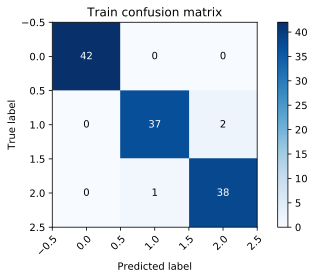

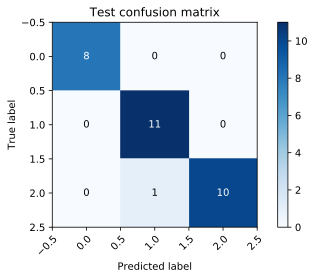

In [18]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(
#         xticks=np.arange(cm.shape[1]),
#            yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
#            xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

classes = np.unique(y_train.values)

plot_confusion_matrix(y_train, predictions_train, classes, title='Train confusion matrix')
plot_confusion_matrix(y_test, predictions_test, classes, title='Test confusion matrix')

plt.show()

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.